# Question 1
Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location where getting the investment has a high chance. But due to its financial restriction, he can choose only between three locations -  Bangalore, Mumbai, and NCR. As a friend, you want to help your friend deciding the location. NCR include Gurgaon, Noida and New Delhi. Find the location where the most number of funding is done. That means, find the location where startups has received funding maximum number of times. Plot the bar graph between location and number of funding. Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign. Consider the startup if any one of the city lies in given locations.

### Explanation:
Here "loc" variable holds all rows of "CityLocation" column. I order to get all cities name where more than 1 city name in present "split" function is used. It split string present is each row on the basis of forwaord slash "/".  
"a=loc.str.split("/",expand=True)" here variable "a" holds a dataframe with 2 columns. Column 1 holds the value to city name which comes first in a particuar row and column 2 holds the values of second city. If 2nd city is not present then column 2 hold "None" values. Like this: <img src = "a.JPG" style="width:200px;height=500px"/>

Then in line 12 both the columns are concatenated to form a single column and in the same line extra spaces of each string in each row is removed and rows with "NA" values are dropped. This is stored in the variable "loc". Now this data is ready to get cleaned.

For Data cleaning and correcting the required cities name "boolean array" is used. Here all city names are not considered, only cities present in Question are renamed and per requirement. 

Then again "boolean array" is used for convering "New Delhi", "Gurgaon" & "Noida" into "NCR". And also for removing other irrelevant cities from "loc" variable.

In line 27 value_counts() function is used for getting the count of unique cities present. And this is stored in "total_count" variable with is of type pandas series. Then "city" & "city_count" variables are used for simply stroing the index (key) and value of "total_count" and printing city names with its count value.

Bar graph is best suited for showing city name with their count values. On X-axis name of city is present and on Y-axis its count is present.

### Conclusion:
From result it can be concluded that NCR will be the best location to establish the product startup. Because this is the location where the most number of funding is done and startups establised here are likely to get funding easily. Then comes "Bangalore" then "Mumbai".

NCR 709
Bangalore 637
Mumbai 449


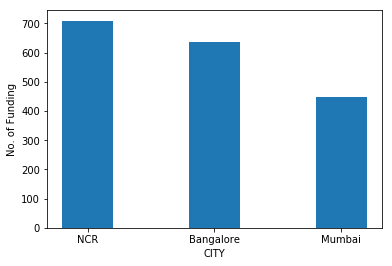

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df=pd.read_csv("startup_funding.csv")  # read csv

loc=df.CityLocation 

# split location name over "/"
a=loc.str.split("/",expand=True) 
# concating both column af dataframe "a" into single column and "NA" dropped
loc=pd.concat([a[0],a[1]]).str.strip().dropna() 

# from here data cleaning starts using boolean array
boolarr=((loc=="Delhi"))  
loc[boolarr]="New Delhi"
boolarr=((loc=="bangalore"))
loc[boolarr]="Bangalore"

boolarr=((loc=="New Delhi") | (loc=="Gurgaon") | (loc=="Noida"))
loc[boolarr]="NCR"

boolarr=((loc=="Bangalore") | (loc=="NCR") | (loc=="Mumbai"))
loc=loc[boolarr]

# getting the count of unique cities present
total_count=loc.value_counts()
city=total_count.index   # holds city names
city_count=total_count.values   # holds count value

# traversing and printing top 3 city name and their number of occurance.
for i in range(3):
    print(city[i],city_count[i])

# Graph plot (Bar-Graph)
plt.bar(city,city_count,width=0.4)
plt.xlabel("CITY")
plt.ylabel("No. of Funding")
plt.show()



# Question 2
Even after trying for so many times, your friend’s startup could not find the investment. So you decided to take this matter in your hand and try to find the list of investors who probably can invest in your friend’s startup. Your list will increase the chance of your friend startup getting some initial investment by contacting these investors. Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also). In a startup, multiple investors might have invested. So consider each investor for that startup. Ignore undisclosed investors.

### Explanation:
Here "name" variable holds the values of "InvestorsName" column which is of type Pandas Series. Then all "NA" values of droped from this. 

"split" fuction is used in order to extract all the names which are separated by commas. And this pandas series is converted into numpy array. Which is further flattened into 1-dimension with this piece of code: "(np.concatenate(all_name).flat)" and extra spaces in each string are removed with split funtion. Then finally this numpy array is converted into pandas series using pd.series function (line 15).

In line 18 value_counts() function is used for getting the count of unique names of investors. This is stored in "name_count" variable.Then simply printed top 5 investor's names with number of investments they have done.

Again Bar graph is best suited for showing Investor's name with their count values of number of investments. On X-axis name of investor is present and on Y-axis their count is ploted (Only top 5 investors).

### Conclusion:
From result it is clear that "Sequoia Capital" has invested most number of times. So this investor will be the best for contacting for getting funds and investments. Then comes "Accel Partners", "Kalaari Capital", "SAIF Partners" and "Indian Angel Network".


Sequoia Capital 64
Accel Partners 53
Kalaari Capital 44
SAIF Partners 41
Indian Angel Network 40


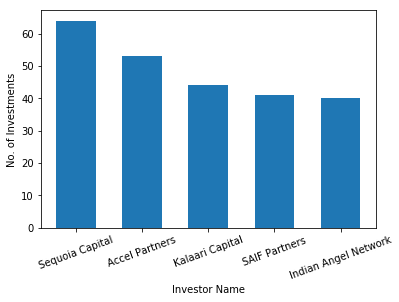

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv("startup_funding.csv")   # read csv

name=df.InvestorsName
name=name.dropna()  # drop "NA" from investorname

# split investor's name over ","
all_name=np.array(name.str.split(","))

# all_name is been flattened into 1D and extra spaces are removed usig strip function.
# finally this numpy array is converted into pandas series
all_name = pd.Series(np.concatenate(all_name).flat).str.strip()

# getting the count of unique investor's name present
name_count = all_name.value_counts()

# traversing and printing top 5 investor's name and their number of occurance.
for i in range(5):
    print(name_count.index[i],name_count.values[i])

# Graph plot (Bar-Graph)
plt.bar(name_count.index[:5],name_count.values[:5],width=0.6)
plt.xlabel("Investor Name")
plt.ylabel("No. of Investments")
plt.xticks(rotation=20)
plt.show()



# Question 3
After re-analysing the dataset you found out that some investors have invested in the same startup at different number of funding rounds. So before finalising the previous list, you want to improvise it by finding the top 5 investors who have invested in different number of startups. This list will be more helpful than your previous list in finding the investment for your friend startup. Find the top 5 investors who have invested maximum number of times in different companies. That means, if one investor has invested multiple times in one startup, count one for that company. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

### Explanation:
Firstly all columns except "InvestorsName" and "StartupName" have been dropped using "drop" function of pandas dataframe (line 8). Then "NA" values of column "InvestorsName" and "StartupName" have been drop and finally index are reset using "reset_index" function. Now dataset is ready to get cleaned.

Cleaned the important startup names like: Ola, Flipkart, Oyo and Paytm using boolean array.

"name" variable is used for "InvestorsName" and "split" fuction is used in order to extract all the names which are separated by commas (line 28). 

Two dictionaries named "d1" and "d2" are created.

Dict "d1" is for maintaining "investor name" and associated startup name:
After removing extra leading space, for each investor names a set is maintained. That means for dict "d1" key is "Investor's name" and values are "startup name" which is inside set. Here sets are used purposely because sets cannot hold duplicate values. So if a investor has already invested in any startup then for the second time that startup name will not be added into set beacuse it has already been added. 

Dict "d2" is for maintaining "investor name" as key and length of set which contain startup name from dict "d1" as values.
In line 40: "setdefault function" is use to insert a new key (ie. investor name) and values in the dictionary "d1" and if that key (investor name) is already present then it will update the value of that key without lossing previous values. And "add" function is use to insert items in set.

Then finally dictionary d2 is sorted with respect to values using itemgetter function present in operator library. And top 5 items of this dictionary is printed. That means top 5 investor's name who have invested maximum number of times in different companies with their no of investment have been printed and plotted on the graph. X-axis: "investor_name" and Y-axis: "number of investment" of that investor.

### Conclusion:
From result it is clear that "Sequoia Capital" has invested most number of times in different companies. So this investor will be the best for contacting for getting funds and investments. Then comes "Accel Partners", "Kalaari Capital", "Indian Angel Network" and "Blume Ventures".



Sequoia Capital 48
Accel Partners 47
Kalaari Capital 41
Indian Angel Network 40
Blume Ventures 36


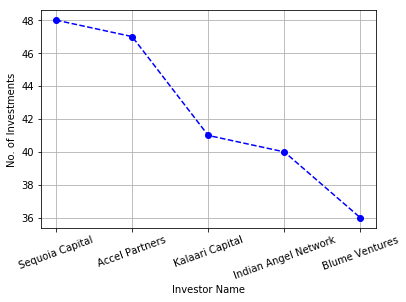

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import operator
df=pd.read_csv("startup_funding.csv")   # read csv

# dropping irrelevent columns
df.drop(df.columns[[0, 1, 3, 4, 5, 7, 8, 9]], axis = 1, inplace = True)

# droping NA from "InvestorsName","StartupName"
df.dropna(subset=["InvestorsName","StartupName"],inplace=True)

# resetting index
df.reset_index(drop=True,inplace=True)

# cleaning data
startup=df.StartupName
boolarr=((startup=="Olacabs") | (startup=="Ola Cabs"))
startup[boolarr]="Ola"
boolarr=((startup=="Oyo Rooms") | (startup=="OyoRooms") | (startup=="OYO Rooms") | (startup=="Oyorooms"))
startup[boolarr]="Oyo"
boolarr=((startup=="Flipkart.com"))
startup[boolarr]="Flipkart"
boolarr=((startup=="Paytm Marketplace"))
startup[boolarr]="Paytm"

name=df.InvestorsName
name=pd.Series(name.str.split(","))   # split investor's name over ","

d1={}
d2={}

# travering name
for i in range(len(name)):
    for j in range(len(name[i])):
        x=name[i][j].strip()   # removing leading spaces from investor's name
        if x=='' or "Undisclosed" in x:   # not considering blank values and values haing "Undisclosed"
            continue    
        # inserting startup name in set and then inserting that set in dictioary as value. Keys are investor's name.
        d1.setdefault(x, set()).add(startup[i])

# calulating length of each set in dictionary "d1" and mapping the length with investor name using dictionary "d2"
for x in d1:
    d2[x]=len(d1[x])

# sorting "d2" on the basis of values using operator library and taking only 1st 5 values.
d2 = dict(sorted(d2.items(), key=operator.itemgetter(1),reverse=True)[:5])

# two lists for graph plotting for x-axis and y-axis 
investor_name=[]
no_of_investment=[]

# traversing and printing top 5 investor's name and their number of occurance.
for x in d2:
    print(x,d2[x])
    investor_name.append(x)
    no_of_investment.append(d2[x])
    
# Graph plotting
plt.plot(investor_name, no_of_investment,"bo--")
plt.xlabel("Investor Name")
plt.ylabel("No. of Investments")
plt.xticks(rotation=20)
plt.grid()
plt.show()  


# Question 4
Even after putting so much effort in finding the probable investors, it didn't turn out to be helpful for your friend. So you went to your investor friend to understand the situation better and your investor friend explained to you about the different Investment Types and their features. This new information will be helpful in finding the right investor. Since your friend startup is at an early stage startup, the best-suited investment type would be - Seed Funding and Crowdfunding. Find the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

### Explanation:
Firstly all columns except "InvestorsName", "InvestmentType" and "StartupName" have been dropped using "drop" function of pandas dataframe (line 8). Then "NA" values of column "InvestorsName", "InvestmentType" and "StartupName" have been drop and finally index are reset using "reset_index" function. Now dataset is ready to get cleaned.

First "InvestmentType" is cleaned and spelling errors have been removed using boolean array. Then rows which are not required have been droped. We only need "Seed funding" and "Crowd funding" for an early stage startup so "Private Equity" and "Debt funding" rows have been droped (line 25) and index are reset. Now StartupName column should be cleaned, only the important startup names like: Ola, Flipkart, Oyo and Paytm has been cleaned using boolean array.

"startup" variable is used for "StartupName" and "name" variable is used for "InvestorsName" and "split" fuction is used in order to extract all the names which are separated by commas (line 40,41,42).

Rest other steps are same as in question 3 (From line 44 onwards).

Finally top 5 investor's name who have invested maximum number of times in different companies having "InvestmenType" as "Seed funding" and "Crowd funding" with their no of investment have been printed and plotted on the graph. X-axis: "investor_name" and Y-axis: "number of investment" of that investor.

### Conclusion:
From result it is clear that "Indian Angel Network" has invested most number of times in different companies having "InvestmenType" as "Seed funding" and "Crowd funding". So this investor will be the best for contacting for getting funds and investments for an early stage startup. Then comes "Rajan Anandan", "LetsVenture", "Anupam Mittal" and "Kunal Shah".


Indian Angel Network 33
Rajan Anandan 23
LetsVenture 16
Anupam Mittal 16
Kunal Shah 14


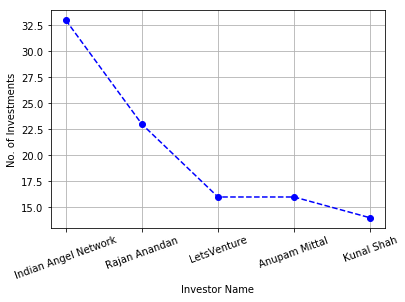

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import operator
df=pd.read_csv("startup_funding.csv")   # read csv

# dropping irrelevent columns
df.drop(df.columns[[0, 1, 3, 4, 5, 8, 9]], axis = 1, inplace = True)

# droping NA from "InvestorsName","InvestmentType" and "StartupName"
df.dropna(subset=["InvestorsName","InvestmentType","StartupName"],inplace=True)

# resetting index
df.reset_index(drop=True,inplace=True)

# cleaning data
boolarr=(df.InvestmentType=="SeedFunding")
df.InvestmentType[boolarr]="Seed Funding"
boolarr=(df.InvestmentType=="PrivateEquity")
df.InvestmentType[boolarr]="Private Equity"
boolarr=(df.InvestmentType=="Crowd funding")
df.InvestmentType[boolarr]="Crowd Funding"

# dropping irrelevent rows where investment type is either "Private Equity" or "Debt Funding"
df.drop(df[(df.InvestmentType == "Private Equity") | (df.InvestmentType == "Debt Funding")].index, inplace = True)

# resetting index
df.reset_index(drop=True,inplace=True)

# cleaning data
boolarr=((df.StartupName=="Olacabs") | (df.StartupName=="Ola Cabs"))
df.StartupName[boolarr]="Ola"
boolarr=((df.StartupName=="Oyo Rooms") | (df.StartupName=="OyoRooms") | (df.StartupName=="OYO Rooms") | (df.StartupName=="Oyorooms"))
df.StartupName[boolarr]="Oyo"
boolarr=((df.StartupName=="Flipkart.com"))
df.StartupName[boolarr]="Flipkart"
boolarr=((df.StartupName=="Paytm Marketplace"))
df.StartupName[boolarr]="Paytm"

startup=df.StartupName
name=df.InvestorsName
name=pd.Series(name.str.split(","))   # split investor's name over ","

d1={}
d2={}

# traversing name
for i in range(len(name)):
    for j in range(len(name[i])):
        x=name[i][j].strip()    # removing leading spaces from investor's name
        if x=='' or "Undisclosed" in x:   # not considering blank values and values haing "Undisclosed"
            continue
        # inserting startup name in set and then inserting that set in dictioary as value. Keys are investor's name.
        d1.setdefault(x, set()).add(startup[i])

# calulating length of each set in dictionary "d1" and mapping the length with investor name using dictionary "d2"
for x in d1:
    d2[x]=len(d1[x])

# sorting "d2" on the basis of values using operator library and taking only 1st 5 values.
d2 = dict(sorted(d2.items(), key=operator.itemgetter(1),reverse=True)[:5])

# two lists for graph plotting for x-axis and y-axis
investor_name=[]
no_of_investment=[]

# traversing and printing top 5 investor's name and their number of occurance.
for x in d2:
    print(x,d2[x])
    investor_name.append(x)
    no_of_investment.append(d2[x])

# Graph plotting
plt.plot(investor_name, no_of_investment,"bo--")
plt.xlabel("Investor Name")
plt.ylabel("No. of Investments")
plt.xticks(rotation=20)
plt.grid()
plt.show() 



# Question 5
Due to your immense help, your friend startup successfully got seed funding and it is on the operational mode. Now your friend wants to expand his startup and he is looking for new investors for his startup. Now you again come as a saviour to help your friend and want to create a list of probable new new investors. Before moving forward you remember your investor friend advice that finding the investors by analysing the investment type. Since your friend startup is not in early phase it is in growth stage so the best-suited investment type is Private Equity. Find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column.There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

### Explanation:
Firstly all columns except "InvestorsName", "InvestmentType" and "StartupName" have been dropped using "drop" function of pandas dataframe (line 8). Then "NA" values of column "InvestorsName", "InvestmentType" and "StartupName" have been drop and finally index are reset using "reset_index" function. Now dataset is ready to get cleaned.

First "InvestmentType" is cleaned and spelling errors have been removed using boolean array. Then rows which are not required have been droped. Since, now the startup is not in early stage so we only need "Private Equity" for growth stage startup so "Seed Funding", "Crowd Funding" and "Debt funding" rows have been droped (line 25) and index are reset. Now StartupName column should be cleaned, only the important startup names like: Ola, Flipkart, Oyo and Paytm has been cleaned using boolean array.

"startup" variable is used for "StartupName" and "name" variable is used for "InvestorsName" and "split" fuction is used in order to extract all the names which are separated by commas (line 40,41,42).

Rest other steps are same as in question 3 and 4 (From line 44 onwards).

Finally top 5 investor's name who have invested maximum number of times in different companies having "InvestmenType" as "Seed funding" and "Crowd funding" with their no of investment have been printed and plotted on the graph. X-axis: "investor_name" and Y-axis: "number of investment" of that investor.

### Conclusion:
From result it is clear that "Sequoia Capital" has invested most number of times in different companies having "InvestmenType" as "Private Equity". So this investor will be the best for contacting for getting funds and investments for growth stage startup. Then comes "Accel Partners", "Kalaari Capital", "Blume Ventures" and "SAIF Partners".


Sequoia Capital 45
Accel Partners 43
Kalaari Capital 35
Blume Ventures 27
SAIF Partners 24


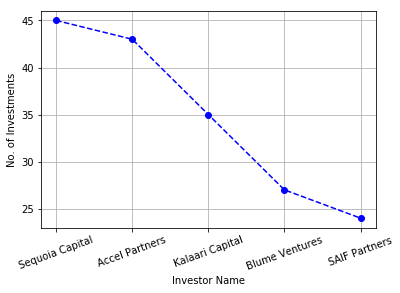

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import operator
df=pd.read_csv("startup_funding.csv")   # read csv

# dropping irrelevent columns
df.drop(df.columns[[0, 1, 3, 4, 5, 8, 9]], axis = 1, inplace = True)

# droping NA from "InvestorsName","InvestmentType" and "StartupName"
df.dropna(subset=["InvestorsName","InvestmentType","StartupName"],inplace=True)

# resetting index
df.reset_index(drop=True,inplace=True)

# cleaning data
boolarr=(df.InvestmentType=="SeedFunding")
df.InvestmentType[boolarr]="Seed Funding"
boolarr=(df.InvestmentType=="PrivateEquity")
df.InvestmentType[boolarr]="Private Equity"
boolarr=(df.InvestmentType=="Crowd funding")
df.InvestmentType[boolarr]="Crowd Funding"

# dropping irrelevent rows where investment type is either "Seed funding", "Crowd Funding" or "Debt Funding"
df.drop(df[(df.InvestmentType == "Seed Funding") | (df.InvestmentType == "Crowd Funding") | (df.InvestmentType == "Debt Funding")].index, inplace = True)

# resetting index
df.reset_index(drop=True,inplace=True)

# cleaning data
boolarr=((df.StartupName=="Olacabs") | (df.StartupName=="Ola Cabs"))
df.StartupName[boolarr]="Ola"
boolarr=((df.StartupName=="Oyo Rooms") | (df.StartupName=="OyoRooms") | (df.StartupName=="OYO Rooms") | (df.StartupName=="Oyorooms"))
df.StartupName[boolarr]="Oyo"
boolarr=((df.StartupName=="Flipkart.com"))
df.StartupName[boolarr]="Flipkart"
boolarr=((df.StartupName=="Paytm Marketplace"))
df.StartupName[boolarr]="Paytm"

startup=df.StartupName
name=df.InvestorsName
name=pd.Series(name.str.split(","))   # split investor's name over ","

d1={}
d2={}

# traversing name
for i in range(len(name)):
    for j in range(len(name[i])):
        x=name[i][j].strip()    # removing leading spaces from investor's name
        if x=='' or "Undisclosed" in x:   # not considering blank values and values haing "Undisclosed"
            continue
        # inserting startup name in set and then inserting that set in dictioary as value. Keys are investor's name.
        d1.setdefault(x, set()).add(startup[i])

# calulating length of each set in dictionary "d1" and mapping the length with investor name using dictionary "d2"
for x in d1:
    d2[x]=len(d1[x])

# sorting "d2" on the basis of values using operator library and taking only 1st 5 values.
d2 = dict(sorted(d2.items(), key=operator.itemgetter(1),reverse=True)[:5])

# two lists for graph plotting for x-axis and y-axis
investor_name=[]
no_of_investment=[]

# traversing and printing top 5 investor's name and their number of occurance.
for x in d2:
    print(x,d2[x])
    investor_name.append(x)
    no_of_investment.append(d2[x])

# Graph plotting
plt.plot(investor_name, no_of_investment,"bo--")
plt.xlabel("Investor Name")
plt.ylabel("No. of Investments")
plt.xticks(rotation=20)
plt.grid()
plt.show() 

